In [ ]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, FlaxBeitForImageClassification

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
 99% 1.03G/1.04G [00:12<00:00, 125MB/s]
100% 1.04G/1.04G [00:12<00:00, 88.5MB/s]


In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/flickr8k.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')  # Replace 'destination_folder' with your desired folder

In [ ]:
with open('/content/data/captions.txt') as f:
  lines = f.read()
  lines = lines.split('\n')

In [ ]:
list_of_sentences = [i.split('.jpg') for i in lines]
list_of_sentences = list_of_sentences[1:-1]
print(list_of_sentences[:10])

[['1000268201_693b08cb0e', ',A child in a pink dress is climbing up a set of stairs in an entry way .'], ['1000268201_693b08cb0e', ',A girl going into a wooden building .'], ['1000268201_693b08cb0e', ',A little girl climbing into a wooden playhouse .'], ['1000268201_693b08cb0e', ',A little girl climbing the stairs to her playhouse .'], ['1000268201_693b08cb0e', ',A little girl in a pink dress going into a wooden cabin .'], ['1001773457_577c3a7d70', ',A black dog and a spotted dog are fighting'], ['1001773457_577c3a7d70', ',A black dog and a tri-colored dog playing with each other on the road .'], ['1001773457_577c3a7d70', ',A black dog and a white dog with brown spots are staring at each other in the street .'], ['1001773457_577c3a7d70', ',Two dogs of different breeds looking at each other on the road .'], ['1001773457_577c3a7d70', ',Two dogs on pavement moving toward each other .']]


In [ ]:
print(list(set([len(i) for i in list_of_sentences])))

[2]


In [ ]:
images = set()
comments = []
for elem in list_of_sentences:
  if elem[0] not in images:
    images.add(elem[0])
    comments.append(elem[1][1:])
print(comments)

['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A black dog and a spotted dog are fighting', 'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A man lays on a bench while his dog sits by him .', 'A man in an orange hat starring at something .', 'A child playing on a rope net .', 'A black and white dog is running in a grassy garden surrounded by a white fence .', '"A dog shakes its head near the shore , a red ball next to it ."', 'A boy smiles in front of a stony wall in a city .', 'A black dog leaps over a log .', 'A brown and white dog is running through the snow .', 'A man in a hat is displaying pictures next to a skier in a blue hat .', 'A collage of one person climbing a cliff .', 'A brown dog chases the water from a sprinkler on a lawn .', 'A dog prepares to catch a thrown object in a field with nearby cars .', 'a black and white dog jumping in the air to get a toy .', 'A child and a woman are at waters e

In [ ]:
x = [len(i) for i in comments]

In [ ]:
print(x.index(max(x)))
print(comments[546])
print(comments[2730])
#загрузить 2730
print(len(comments))

546
"A dark haired woman wearing a brown jacket and fatigue bottoms and a balding man wearing a green sweater and blue jeans with a fishing pole , stand at the foot of the surf ."
A man is squirting water into a white dog 's mouth with a squirt gun .
8091


In [ ]:
all_comments = [elem[1][1:] for elem in list_of_sentences]

In [ ]:
print(all_comments.index("A man is squirting water into a white dog 's mouth with a squirt gun ."))

13650


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import argparse

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread("/content/data/Images/2709683703_5385ea9ef4.jpg")

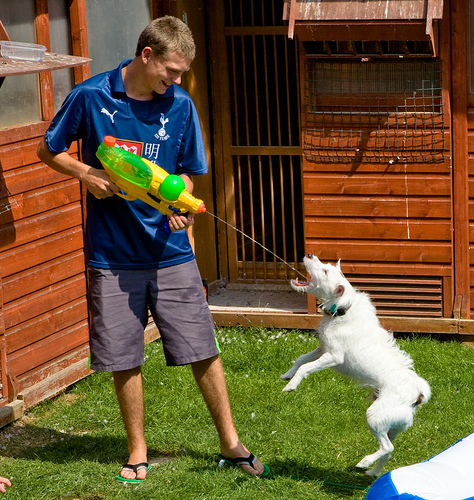

In [ ]:
cv2_imshow(image)

In [ ]:
comments_according_to_images ={}
for elem in list_of_sentences:
  if str(elem[0]) + '.jpg' in comments_according_to_images.keys():
    comments_according_to_images[str(elem[0]) + '.jpg'].append(elem[1][1:])
  else:
    comments_according_to_images[str(elem[0]) + '.jpg'] = [elem[1][1:]]

In [ ]:
comments_according_to_images['2709683703_5385ea9ef4.jpg']

["A man is squirting water into a white dog 's mouth with a squirt gun .",
 'A man spraying a super soaker into the mouth of a dog .',
 "A young man squirts water from a water gun into a dog 's mouth .",
 'Man squirts water gun in dogs mouth',
 'The young man with the water gun is shooting water into the white dogs mouth .']

In [ ]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')
def sentence_to_vec(s, model):
    words = s.lower().split()
    vec = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

[==================================================] 100.0% 1662.8/1662.8MB downloaded


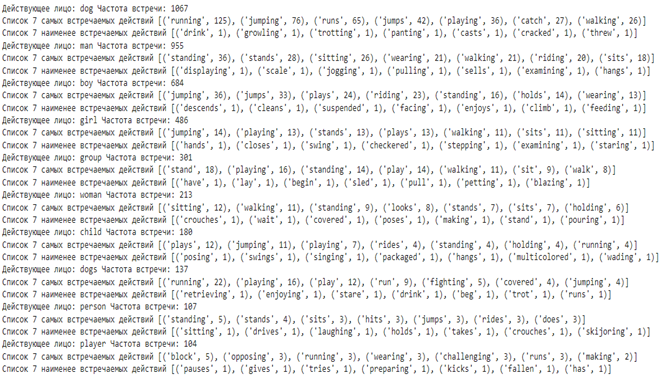

In [ ]:
print(str(list_of_sentences[13650][0])+'.jpg')

2709683703_5385ea9ef4.jpg


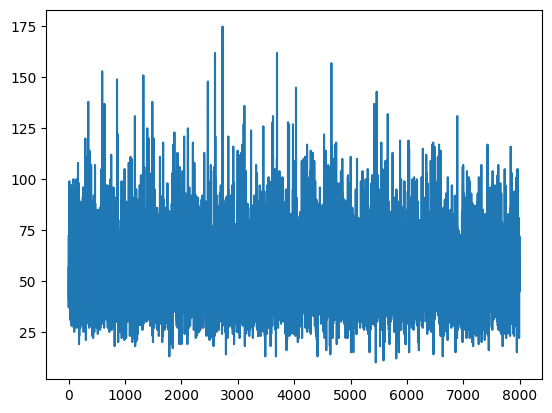

In [ ]:
plt.plot([i for i in range(len(comments))],x)

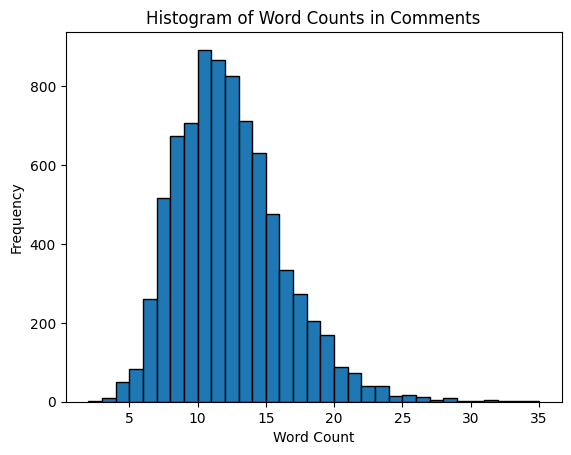

In [ ]:
word_counts = [len(comment.split()) for comment in comments]

# Построение гистограммы
plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 1, 1), edgecolor='black')
plt.title('Histogram of Word Counts in Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

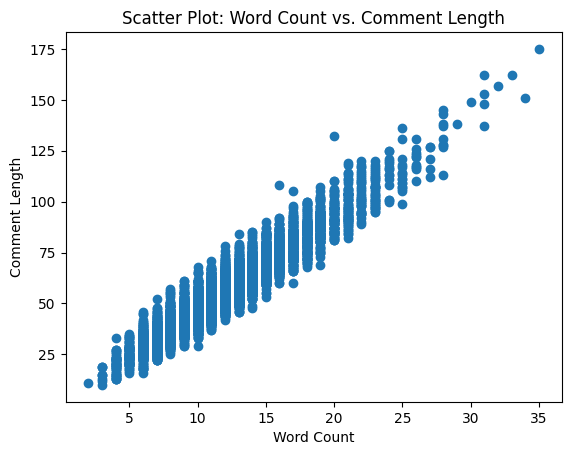

In [ ]:
comment_lengths = [len(comment) for comment in comments]

# Построение диаграммы рассеяния
plt.scatter(word_counts, comment_lengths)
plt.title('Scatter Plot: Word Count vs. Comment Length')
plt.xlabel('Word Count')
plt.ylabel('Comment Length')
plt.show()

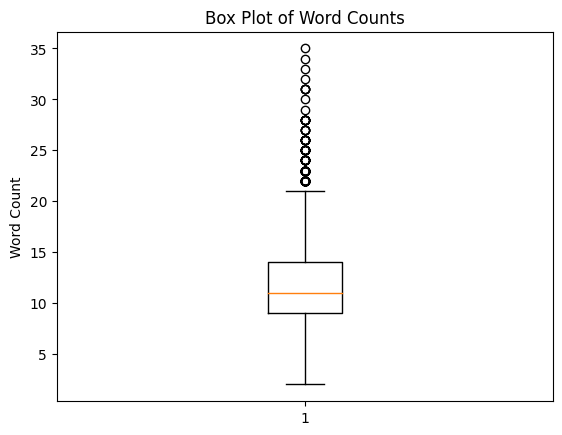

In [ ]:
plt.boxplot(word_counts)
plt.title('Box Plot of Word Counts')
plt.ylabel('Word Count')
plt.show()

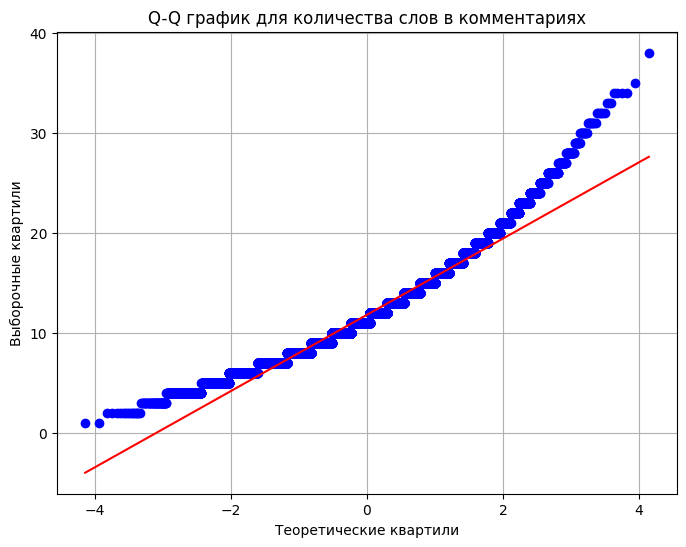

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(word_counts, dist="norm", plot=plt)
plt.title('Q-Q график для количества слов в комментариях')
plt.xlabel('Теоретические квартили')
plt.ylabel('Выборочные квартили')
plt.grid(True)
plt.show()

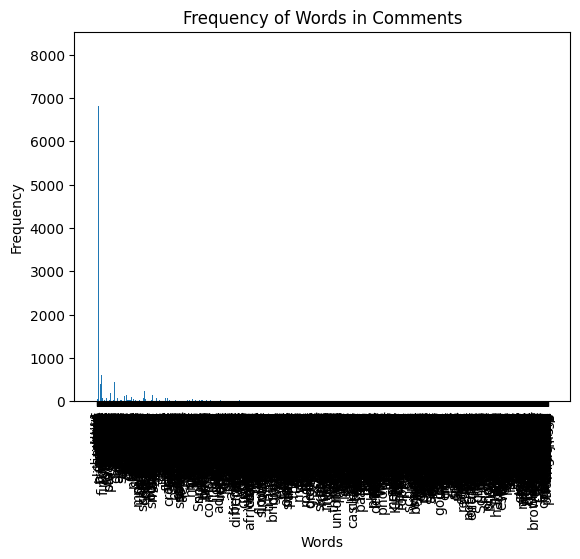

In [ ]:
from collections import Counter
import nltk

# Токенизация комментариев и подсчет частоты слов
all_words = ' '.join(comments).split()
word_freq = Counter(all_words)

# Построение гистограммы частоты слов
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Frequency of Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

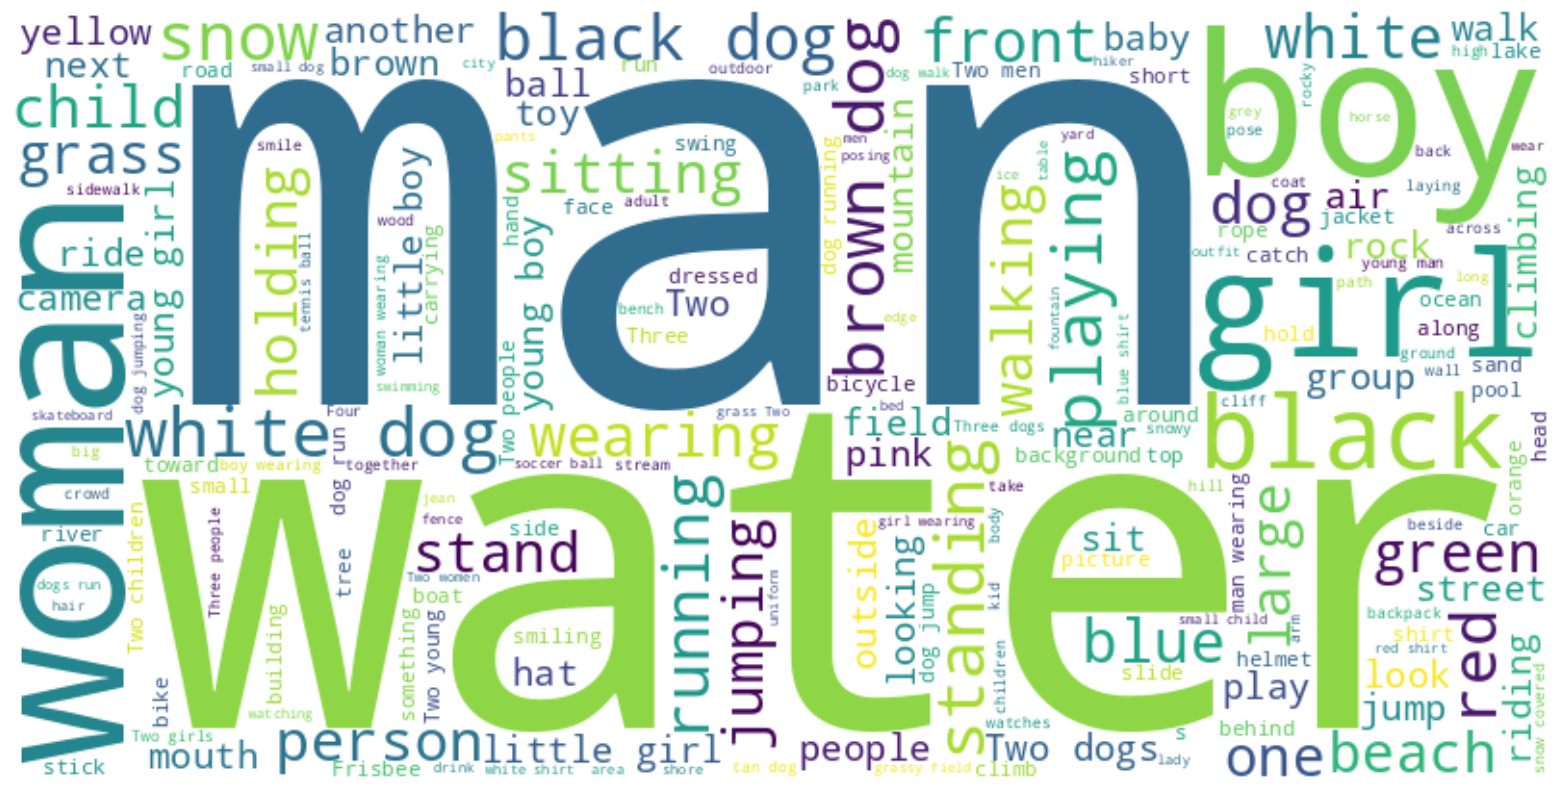

In [ ]:
from wordcloud import WordCloud

# Создание объекта WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Вывод облака слов
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


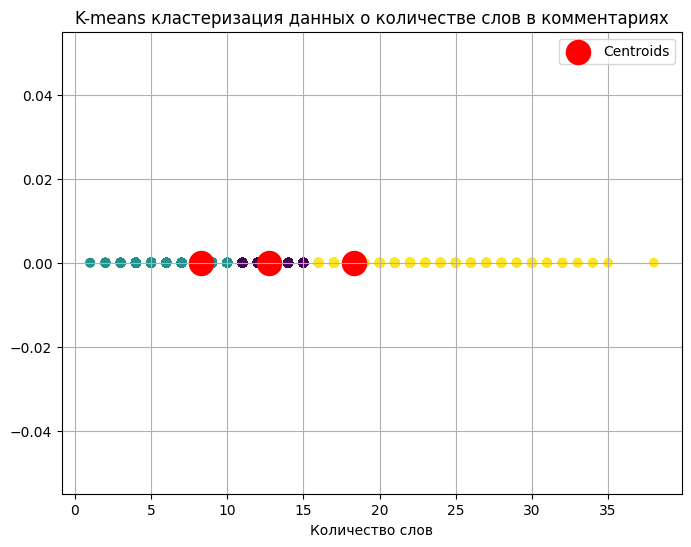

In [ ]:
from sklearn.cluster import KMeans
word_counts = np.array([len(comment.split()) for comment in comments]).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(word_counts)

# Получение меток кластеров
labels = kmeans.labels_

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(word_counts, np.zeros_like(word_counts), c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), s=300, c='red', label='Centroids')
plt.title('K-means кластеризация данных о количестве слов в комментариях')
plt.xlabel('Количество слов')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


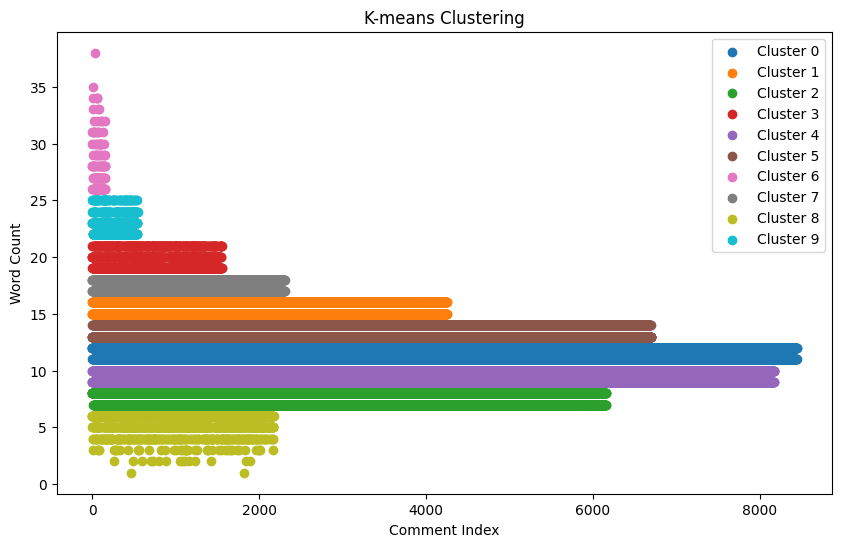

In [ ]:
word_counts = np.array([len(comment.split()) for comment in comments]).reshape(-1, 1)

# Инициализируем и обучаем модель KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(word_counts)

# Получаем предсказанные кластеры
clusters = kmeans.predict(word_counts)

# Визуализация распределения по кластерам
plt.figure(figsize=(10, 6))
for i in range(10):  # Предполагается, что у вас 3 кластера
    cluster_words = word_counts[clusters == i]
    plt.scatter(np.arange(len(cluster_words)), cluster_words, label=f'Cluster {i}')

plt.title('K-means Clustering')
plt.xlabel('Comment Index')
plt.ylabel('Word Count')
plt.legend()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Предположим, у нас есть список количества слов в комментариях
word_counts = np.array([len(comment.split()) for comment in comments]).reshape(-1, 1)

# Выполняем иерархическую кластеризацию
linked = linkage(word_counts, 'ward')  # Метод 'ward' используется для иерархической кластеризации

# Визуализируем дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=word_counts.flatten(),
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Comment Index')
plt.ylabel('Word Count')
plt.show()

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Создайте объект анализа настроения
analyzer = SentimentIntensityAnalyzer()

# Введите текст для анализа
text = "Этот продукт ужасен! Никому не рекомендую."

# Проанализируйте текст
analysis = analyzer.polarity_scores(text)

In [ ]:
print(analysis)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


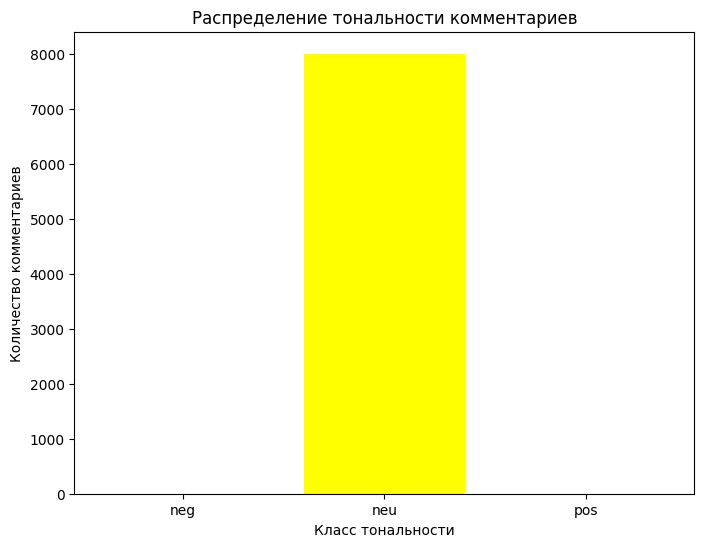

In [ ]:
# Проанализируйте каждый комментарий
results = []
for comment in comments:
    analysis = analyzer.polarity_scores(comment)
    del analysis['compound']
    results.append(max(analysis, key=analysis.get))

# Подсчитайте количество комментариев в каждом классе
tone_counts = {'neg': 0, 'neu': 0, 'pos': 0}
for tone_class in results:
    tone_counts[tone_class] += 1

# Выберите цвета для каждого класса
colors = {'positive': 'green', 'neutral': 'yellow', 'negative': 'red'}

# Постройте цветовой график распределения
plt.figure(figsize=(8, 6))
plt.bar(tone_counts.keys(), tone_counts.values(), color=colors.values())
plt.title('Распределение тональности комментариев')
plt.xlabel('Класс тональности')
plt.ylabel('Количество комментариев')
plt.show()

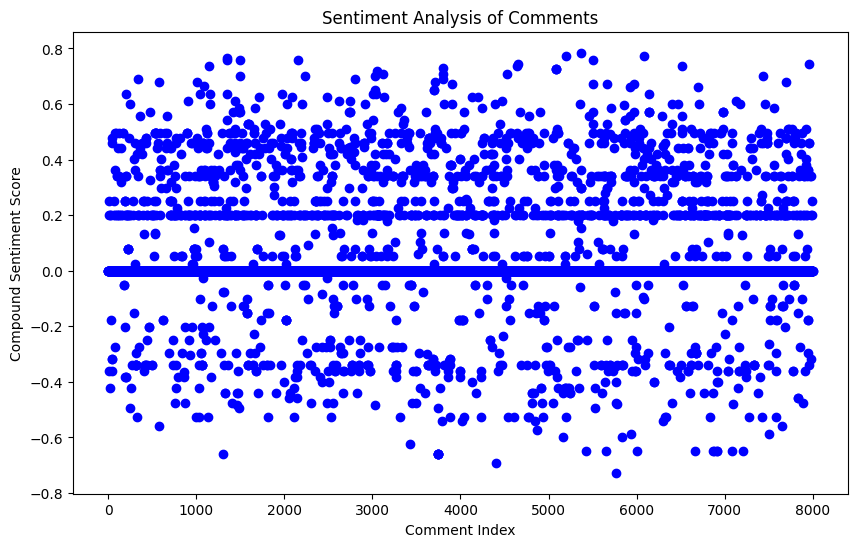

In [ ]:
sentiment_scores = []

# Проходим по каждому комментарию и анализируем тональность
for comment in comments:
    sentiment = analyzer.polarity_scores(comment)
    # Извлекаем комбинированную оценку тональности
    compound_score = sentiment['compound']
    sentiment_scores.append(compound_score)

# Визуализация оценок тональности
plt.figure(figsize=(10, 6))
plt.scatter(range(len(comments)), sentiment_scores, color='blue')
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Comment Index')
plt.ylabel('Compound Sentiment Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


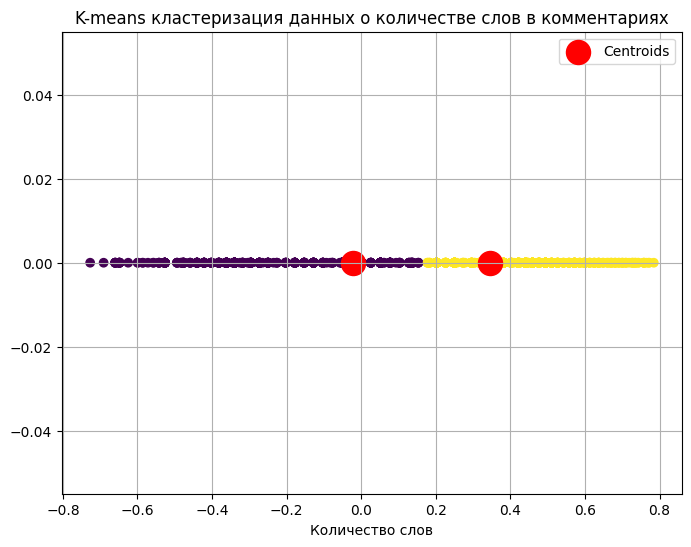

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(sentiment_scores).reshape(-1, 1))

# Получаем предсказанные кластеры
labels = kmeans.labels_

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(sentiment_scores, np.zeros_like(sentiment_scores), c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), s=300, c='red', label='Centroids')
plt.title('K-means кластеризация данных о количестве слов в комментариях')
plt.xlabel('Количество слов')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


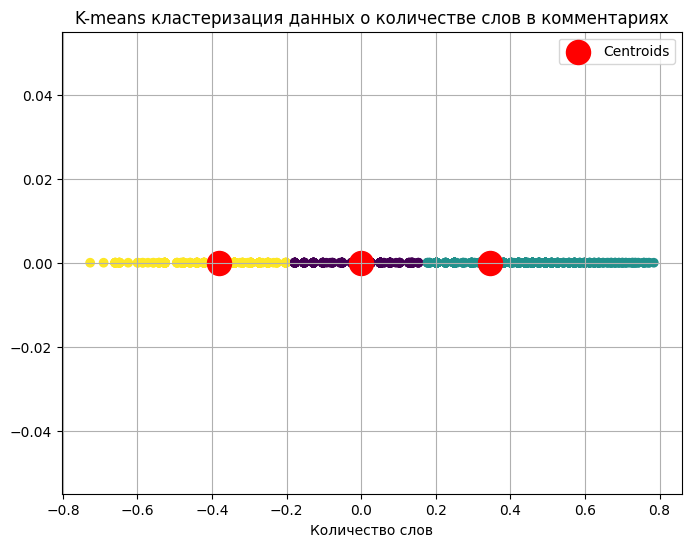

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(sentiment_scores).reshape(-1, 1))

# Получаем предсказанные кластеры
labels = kmeans.labels_

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(sentiment_scores, np.zeros_like(sentiment_scores), c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), s=300, c='red', label='Centroids')
plt.title('K-means кластеризация данных о количестве слов в комментариях')
plt.xlabel('Количество слов')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(len(comments), len(list_of_sentences))

40454 40454


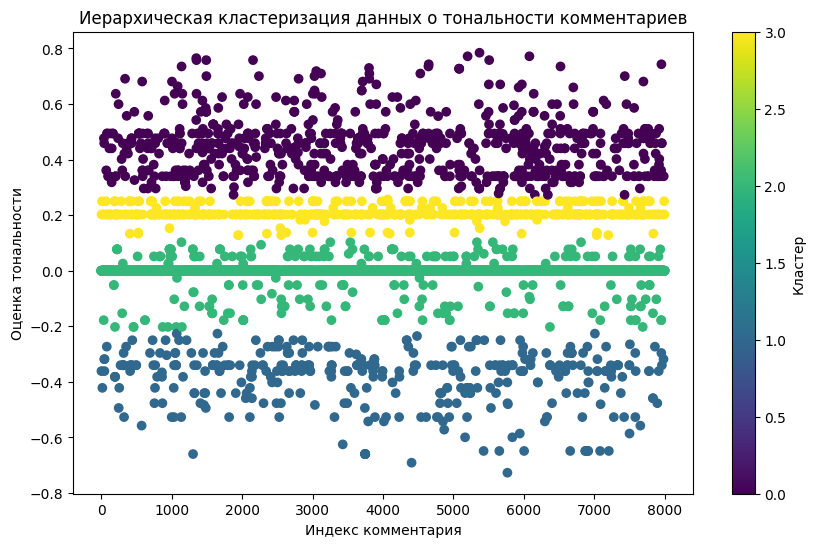

In [ ]:
from sklearn.cluster import AgglomerativeClustering


# Преобразуем список оценок в двумерный массив для кластеризации
sentiment_matrix = np.array(sentiment_scores).reshape(-1, 1)

# Инициализируем и обучаем модель AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clustering.fit(sentiment_matrix)

# Получаем предсказанные кластеры
labels = agg_clustering.labels_

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(range(len(comments)), sentiment_scores, c=labels, cmap='viridis', marker='o')
plt.title('Иерархическая кластеризация данных о тональности комментариев')
plt.xlabel('Индекс комментария')
plt.ylabel('Оценка тональности')
plt.colorbar(label='Кластер')
plt.show()

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
print(list_of_sentences[:3])

[['1000268201_693b08cb0e', ',A child in a pink dress is climbing up a set of stairs in an entry way .'], ['1000268201_693b08cb0e', ',A girl going into a wooden building .'], ['1000268201_693b08cb0e', ',A little girl climbing into a wooden playhouse .']]


In [ ]:
words = [word for sentence in list_of_sentences for word in list_of_sentences.split()]

# Получаем список частей речи для каждого слова во всех предложениях
pos_tags = nltk.pos_tag(words)

# Подсчитываем частоту каждой части речи
pos_counts = Counter(tag for word, tag in pos_tags)

# Получаем список частей речи и их количества
parts_of_speech = list(pos_counts.keys())
counts = list(pos_counts.values())

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(parts_of_speech, counts)
plt.title('Распределение частей речи во всех предложениях')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Поворачиваем метки на оси X на 45 градусов
plt.show()

AttributeError: 'list' object has no attribute 'split'